In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

df = pd.read_csv("RATUNIL JM sales data.csv")

In [50]:
df.sort_values('date', ascending= True)

,branch_name,city,customer_name,membership,gender,product_name,category,price,payment_name,quantity,date,time,rating,country,total_sales
525,Main Branch,Nagasaki,Edward Elric,Member,Male,Hydrating Face Cream,Health and beauty,23.86,Credit card,8,2019-01-01,14:47:00,5.7,Japan,190.88
1843,Second Branch,Naypyitaw,Beyoncé Knowles,Member,Female,Lip Balm Set,Health and beauty,0.08,Ewallet,8,2019-01-01,19:31:00,6.3,Myanmar,0.64
1087,Third Branch,Mandalay,Ariana Grande,Normal,Female,Hand Cream,Health and beauty,0.06,Credit card,4,2019-01-01,20:26:00,6.9,Myanmar,0.24
1491,Second Branch,Naypyitaw,Ariana Grande,Normal,Female,Leather Wallet,Fashion accessories,0.30,Cash,10,2019-01-01,19:48:00,7.0,Myanmar,3.00
1693,Main Branch,Yangon,Ryan Reynolds,Member,Male,Wooden Picture Frame,Home and lifestyle,0.14,Credit card,9,2019-01-01,13:55:00,7.7,Myanmar,1.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,Main Branch,Nagasaki,Hinata Hyuga,Member,Female,Soft Home Cushion,Home and lifestyle,20.74,Cash,8,2019-03-30,19:26:00,4.0,Japan,165.92
803,Second Branch,Hiroshima,Guts,Normal,Male,Soy Protein Powder,Food and beverages,48.32,Ewallet,9,2019-03-30,14:43:00,6.0,Japan,434.88
1027,Main Branch,Yangon,Emma Watson,Member,Female,Throw Pillow,Home and lifestyle,0.12,Cash,8,2019-03-30,19:26:00,4.0,Myanmar,0.96
1332,Second Branch,Naypyitaw,John Cena,Normal,Male,Granola Bars,Food and beverages,0.04,Cash,3,2019-03-30,20:37:00,6.7,Myanmar,0.12


## Total Sales Revenue by country

### Here we see the amount of revenue collected from each country. We can see that there is a very big disparity between Japan and Myanmar. This amount of disparity should be suspicious, it would imply something has gone wrong in calculating or converting values. But no on closer inspection, we can see that Japanese people, though on average buying the same amount of product, pay astronomically more than the Burmese by several magnitudes.

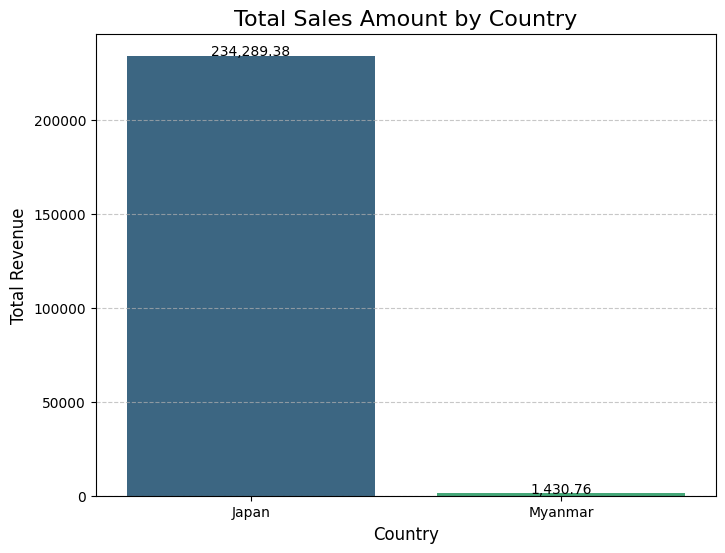

In [ ]:



df['total_sales'] = df['quantity'] * df['price']


country_sales = df.groupby('country')['total_sales'].sum().reset_index()

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=country_sales, x='country', y='total_sales', hue='country', palette='viridis')

# 4. Add Labels and Formatting
plt.title('Total Sales Amount by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 5. Add exact numbers on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.1,
            f'{height:,.2f}', # Format with commas and 2 decimals
            ha="center")

plt.show()

In [38]:
df[df['country']== 'Japan'].describe()

,price,quantity,date,rating,total_sales
count,1000.000000,1000.000000,1000,1000.00000,1000.000000
mean,43.384050,5.510000,2019-02-14 00:05:45.600000,6.97270,234.289380
min,3.930000,1.000000,2019-01-01 00:00:00,4.00000,3.930000
25%,18.620000,3.000000,2019-01-24 00:00:00,5.50000,71.560000
50%,31.410000,5.000000,2019-02-13 00:00:00,7.00000,145.070000
75%,53.550000,8.000000,2019-03-08 00:00:00,8.50000,298.060000
max,211.390000,10.000000,2019-03-30 00:00:00,10.00000,2113.900000
std,38.405559,2.923431,NaN,1.71858,265.255035


In [39]:
df[df['country']== 'Myanmar'].describe()

,price,quantity,date,rating,total_sales
count,1000.000000,1000.000000,1000,1000.00000,1000.000000
mean,0.264990,5.510000,2019-02-14 00:05:45.600000,6.97270,1.430760
min,0.020000,1.000000,2019-01-01 00:00:00,4.00000,0.020000
25%,0.110000,3.000000,2019-01-24 00:00:00,5.50000,0.420000
50%,0.190000,5.000000,2019-02-13 00:00:00,7.00000,0.875000
75%,0.320000,8.000000,2019-03-08 00:00:00,8.50000,1.820000
max,1.300000,10.000000,2019-03-30 00:00:00,10.00000,13.000000
std,0.239183,2.923431,NaN,1.71858,1.645615


# Total Sales Revenue by city

### The point made in the previous insight is further cemented here. The vast majority of revenue gained is from Nagasaki, Tokyo, and Hiroshima all Japanese cities dwarfing the competition.

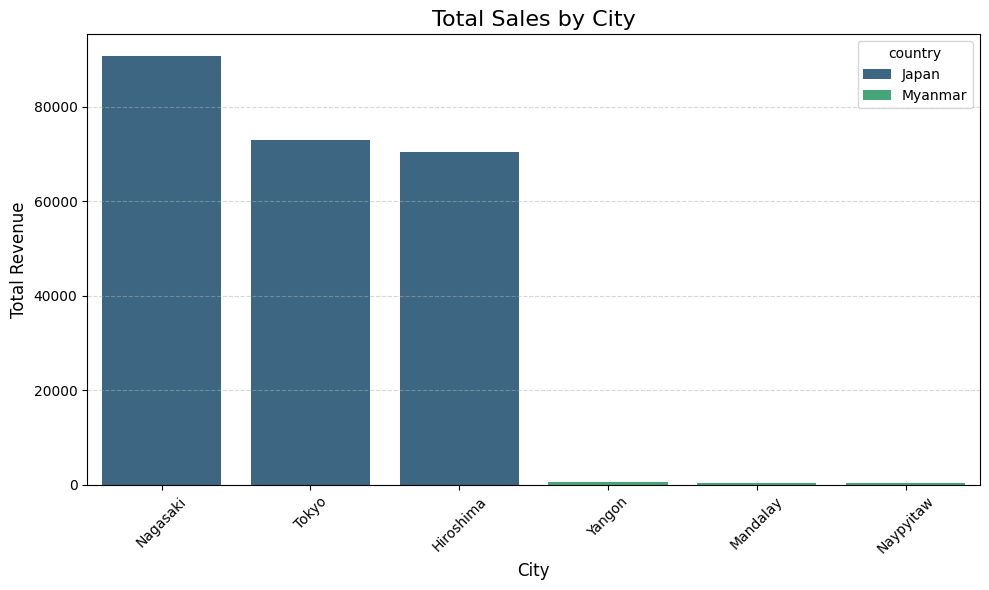

In [40]:

# 1. Calculate Total Sales (Revenue)
df['total_sales'] = df['quantity'] * df['price']

# 2. Group by City AND Country
#    (We keep 'country' so we can use it for coloring the bars)
city_sales = df.groupby(['city', 'country'])['total_sales'].sum().reset_index()

# 3. Sort from Highest to Lowest (Essential for readable bar charts)
city_sales = city_sales.sort_values('total_sales', ascending=False)

# 4. Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=city_sales, 
    x='city', 
    y='total_sales', 
    hue='country',    # <--- This colors the bars by country
    dodge=False,      # Keeps bars centered since cities don't overlap between countries
    palette='viridis'
)

# 5. Formatting
plt.title('Total Sales by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45) # Tilts city names so they don't crash into each other
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Gender Distribution

### Here we see a farely even distribution between males and females in the demographics of customers. 

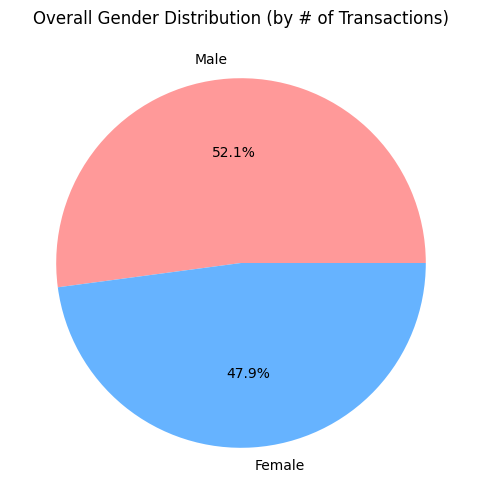

In [41]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Overall Gender Distribution (by # of Transactions)')
plt.show()

## Rating Distribution

### Rating are very even across the board, you could get a range of experiences when buying from this business, you are not guaranteed or atleast favored to have a good product by the end

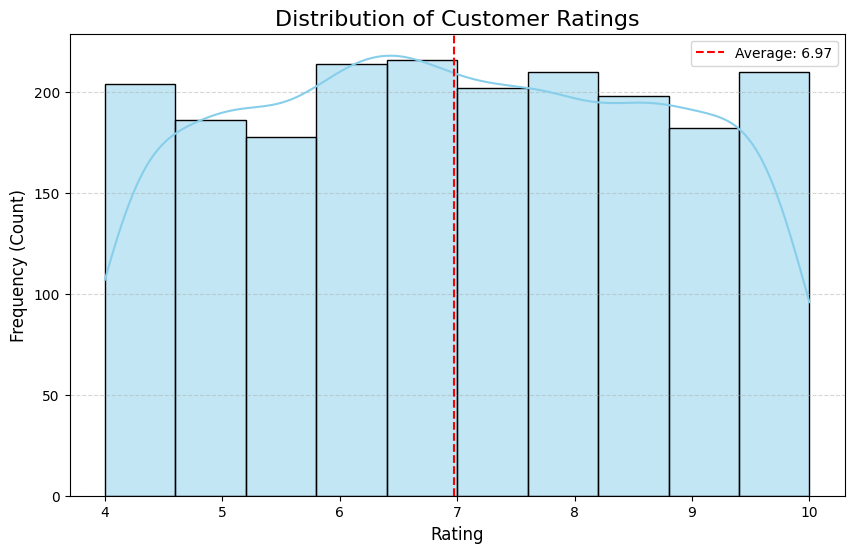

In [47]:

# 1. Create the Histogram
plt.figure(figsize=(10, 6))

# 'kde=True' adds that smooth curve line on top of the bars
sns.histplot(data=df, x='rating', bins=10, kde=True, color='skyblue')

# 2. Add labels
plt.title('Distribution of Customer Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency (Count)', fontsize=12)

# Optional: Add a vertical line for the average rating
avg_rating = df['rating'].mean()
plt.axvline(avg_rating, color='red', linestyle='--', label=f'Average: {avg_rating:.2f}')
plt.legend()

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Amount of Items sold by category

### Fashion accessories and electronics find their way to the top two of our most items sold by category food and beverages being the least.

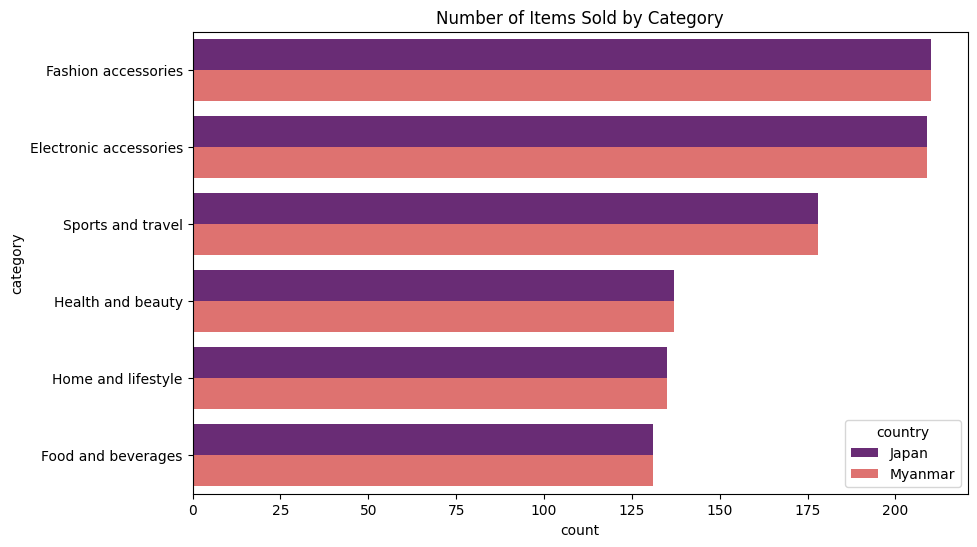

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df, 
    y='category', 
    hue='country', 
    order=df['category'].value_counts().index, # Sort by most frequent
    palette='magma'
)
plt.title('Number of Items Sold by Category')
plt.show()